In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
#wsytępują wartości 0, zakładam że część osób mogła dostać bilety na promocji lub za darmo, zatem nie usuwam tych rekordów
#There are some 0 values. I assume that they represent give away ticket and special invitations, therefore I do not delete these records.
np.sort(dataset['Fare'].values)

array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   4.0125,   5.    ,   6.2375,
         6.4375,   6.45  ,   6.4958,   6.4958,   6.75  ,   6.75  ,
         6.8583,   6.95  ,   6.975 ,   6.975 ,   7.0458,   7.05  ,
         7.05  ,   7.05  ,   7.05  ,   7.05  ,   7.05  ,   7.05  ,
         7.0542,   7.0542,   7.125 ,   7.125 ,   7.125 ,   7.125 ,
         7.1417,   7.225 ,   7.225 ,   7.225 ,   7.225 ,   7.225 ,
         7.225 ,   7.225 ,   7.225 ,   7.225 ,   7.225 ,   7.225 ,
         7.225 ,   7.2292,   7.2292,   7.2292,   7.2292,   7.2292,
         7.2292,   7.2292,   7.2292,   7.2292,   7.2292,   7.2292,
         7.2292,   7.2292,   7.2292,   7.2292,   7.25  ,   7.25  ,
         7.25  ,   7.25  ,   7.25  ,   7.25  ,   7.25  ,   7.25  ,
         7.25  ,   7.25  ,   7.25  ,   7.25  ,   7.25  ,   7.3125,
         7.4958,   7.4958,   7.4958,   7.5208,   7.55  ,   7.5

In [3]:
fare_prices = dataset['Fare'].values

In [5]:
mean_fare = np.round(np.mean(fare_prices))
median_fare = np.median(fare_prices)
mode_fare = stats.mode(fare_prices)
q0 = np.round(np.quantile(fare_prices, 0.0))
q1 = np.round(np.quantile(fare_prices, 0.25))
q3 = np.round(np.quantile(fare_prices, 0.75))
q4 = np.round(np.quantile(fare_prices, 1.0))
range_fare = max(fare_prices) - min(fare_prices)
iqr = q3 - q1
variance_fare = np.var(fare_prices, ddof=1)
standard_deviation_fare = np.std(fare_prices, ddof=1)

print(f'Mean: {mean_fare}')
print(f'Median: {median_fare}')
print(f'Mode: {mode_fare}')
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2/median: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')
print(f'Range: {range_fare}')
print(f'IQR: {iqr}')
print(f'Variance: {variance_fare}')
print(f'Std dev: {standard_deviation_fare}')
print('Skew: Positive')

Mean: 32.0
Median: 14.4542
Mode: ModeResult(mode=array([8.05]), count=array([43]))
Q0: 0.0
Q1: 8.0
Q2/median: 14.4542
Q3: 31.0
Q4: 512.0
Range: 512.3292
IQR: 23.0
Variance: 2469.436845743116
Std dev: 49.6934285971809
Skew: Positive


C:\Users\jrosl\AppData\Local\Temp\ipykernel_10420\4229508160.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare_prices)


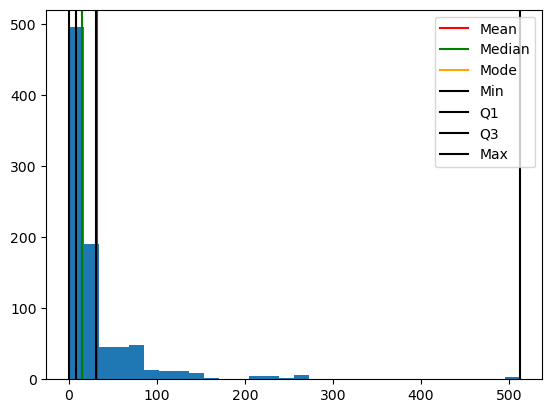

In [6]:
plt.hist(fare_prices, bins=30)
plt.axvline(x = mean_fare, color='red', label = 'Mean')
plt.axvline(x = median_fare, color='green', label = 'Median')
plt.axvline(x = mode_fare[0], color='orange', label = 'Mode')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

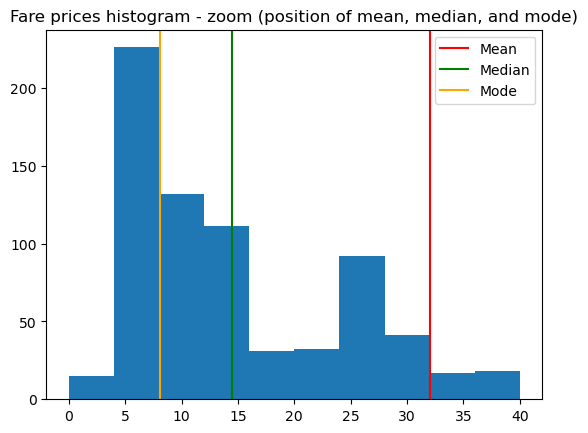

In [11]:
#a specific range for the hist, showing positioning of 3M
#fragment wykresu lepiej obrazujący położenie 3M
plt.hist(fare_prices, range=(0,40))
plt.title('Fare prices histogram - zoom (position of mean, median, and mode)')
plt.axvline(x = mean_fare, color='red', label = 'Mean')
plt.axvline(x = median_fare, color='green', label = 'Median')
plt.axvline(x = mode_fare[0], color='orange', label = 'Mode')
plt.legend(loc='upper right')
plt.show()

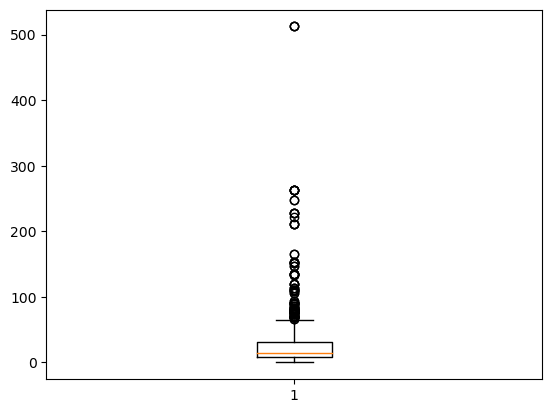

In [ ]:
plt.boxplot(fare_prices)
plt.show()

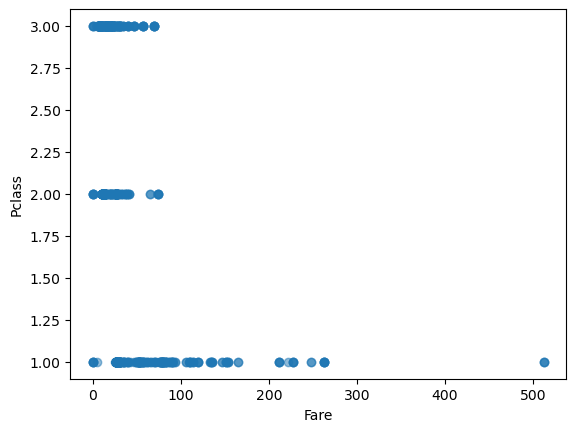

In [12]:
#Fare vs passenger class
#Cena biletu, a klasa pasażera
p_class = dataset.loc[dataset['Pclass'].notnull(), 'Pclass'].values
plt.scatter(x=fare_prices, y=p_class, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.show()

In [13]:
stats.pearsonr(fare_prices, p_class)

PearsonRResult(statistic=-0.5494996199439077, pvalue=1.9673861734207248e-71)

In [14]:
print('Istnieje zauważalna zależność pomiędzy ceną biletu, a klasą pasażera')

Istnieje zauważalna zależność pomiędzy ceną biletu, a klasą pasażera
